# Quick Start

We use the Iris dataset from RDatasets.jl to demonstrate the basic usage of Coefplots.jl

In [1]:
include("../src/Coefplots.jl")
using .Coefplots
# using Coefplots
using RDatasets
using GLM
using DataFrames

df = dataset("datasets", "iris"); 

## Example 1
Plot the regression directly. 

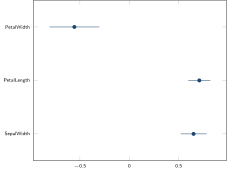

In [2]:
# Example 1
ols1 = lm(@formula(SepalLength ~ SepalWidth + PetalLength + PetalWidth), df)
plot(ols1)
# plot(ols1,"../asset/example1.svg")

## Example 2
You can also convert the regression model into a Coefplot object, then add other attributes of the plot using `setxtitle!()`, `setytitle!()`, `setname!()`, `includenote!()` before you plot your regression.

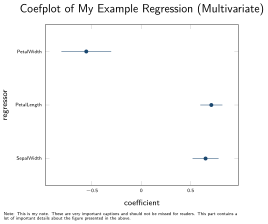

In [3]:
# Example 2
coefplot = Coefplots.parse(ols1)
setxtitle!(coefplot,"coefficient")
setytitle!(coefplot,"regressor")
setname!(coefplot,"Coefplot of My Example Regression (Multivariate)")
includenote!(coefplot,"Note: This is my note. These are very important captions and should not be missed for readers. This part contains a lot of important details about the figure presented in the above.")
plot(coefplot)
# plot(coefplot,"../asset/example2_multivariate.svg")

## Example 3
To combine results from multiple coefplots and plot them in one Coefplot, use the command `concat()`

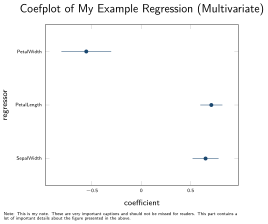

In [4]:
# Example 3
uni1 = lm(@formula(SepalLength~SepalWidth), df)
uni2 = lm(@formula(SepalLength~PetalLength), df)
uni3 = lm(@formula(SepalLength~PetalWidth), df)

coefplot_bivar = Coefplots.concat(Coefplots.parse.([uni1,uni2,uni3]))
setxtitle!(coefplot_bivar,"coefficient")
setytitle!(coefplot_bivar,"regressor")
setname!(coefplot_bivar,"Coefplot of My Example Regression (Univariate)")
includenote!(coefplot_bivar,"Note: This is my note. These are very important captions and should not be missed for readers. This part contains a lot of important details about the figure presented in the above.")
plot(coefplot)
# plot(coefplot_bivar,"../asset/example2_univariate.svg")

## Example 4
To plot multiple coefplots together as a MultiCoefplot, construct the MultiCoefplot object from `MultiCoefplot()`

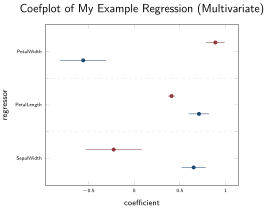

In [5]:
# Example 4
mcoefplot = Coefplots.MultiCoefplot(:model1 => coefplot, :model2 => coefplot_bivar)
plot(mcoefplot)
# plot(mcoefplot,"../asset/example2_multicoefplot.svg")